In [1]:
# IMPORT STATEMENTS
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import SMaRT.MacUtils as mut
reload(mut)

<module 'SMaRT.MacUtils' from '/booleanfs2/sahoo/BoNE/SMaRT/MacUtils.py'>

In [70]:
import pandas as pd
import numpy as np
import bone
reload(bone)
import Datasets
reload(Datasets)
import Datasets_hh
reload(Datasets_hh)
hu = bone.hu

# Figure 2b

Sun 2025 bpd scblk (n = 24)
LungMAP DCC http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=LP9
24 [11, 4, 5, 4] LungMAP DCC http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=LP9 LP9
[48]


Text(0.5, 1.0, 'LungMap BPD')

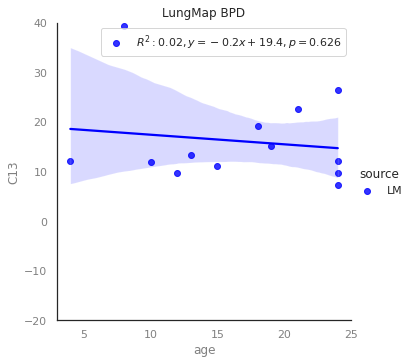

In [38]:
wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getSun2025BPD()
ana.orderData(l1, wt1)
disease = ana.h.getSurvName("c disease")
atype = ana.h.getSurvName('c age')
btype = ana.h.getSurvName('c age-unit')
atype = [str(atype[i])+"-"+str(btype[i]) for i in range(len(atype))]
ahash = {'4-month':4, '5-month':5, '6-month':6, '7-month':7,
'8-month':8, '316-day':10, '11-month':11, '12-month':12,
'13-month':13, '14-month':14, '15-month':15, '18-month':18,
'19-month':19, '20-month':20, '21-month':21, '3-year':24}
age = [ahash[k] if k in ahash else None for k in atype]
sex = ana.h.getSurvName('c sex')
ahash = {'female':1, 'male':0}
sex_n = [ahash[k] if k in ahash else None for k in sex]
race = ana.h.getSurvName('c Race/ Ethnicity')
ahash = {'White':0, 'Hispanic':1, 'Black':2}
race_n = [ahash[k] if k in ahash else None for k in race]
ahash = {'White':0, 'Hispanic':0, 'Black':1}
black = [ahash[k] if k in ahash else None for k in race]
ahash = {'White':0, 'Hispanic':1, 'Black':0}
hisp = [ahash[k] if k in ahash else None for k in race]
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['sex'] = sex[2:]
df['gender'] = sex_n[2:]
df['source'] = 'LM'
df['race'] = race[2:]
df['eth'] = race_n[2:]
df['black'] = black[2:]
df['hispanic'] = hisp[2:]
df['disease'] = disease[2:]
df1 = df[df['disease'] != 'control']
g = bone.sns.lmplot(x='age', y='C13', hue='source', palette=['blue', 'red'], data=df1)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
ax.set_ylim([-20, 40])
ax.set_title("LungMap BPD")
# pdf.savefig(transparent=True, bbox_inches = 'tight')



# Figure 2 c-f

Sun 2025 bpd scblk celltype (n = 871)
LungMAP DCC http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=LP9.2
871 [406, 134, 185, 146] LungMAP DCC http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=LP9.2 LP9.2
[48]


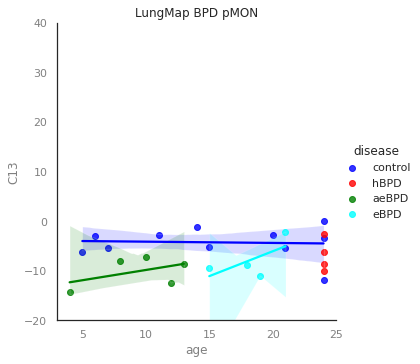

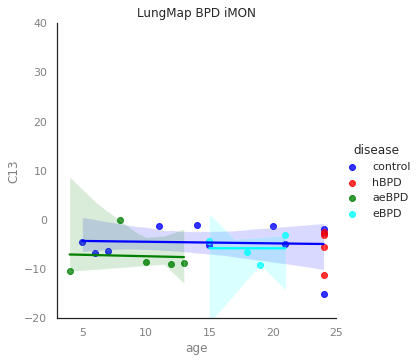

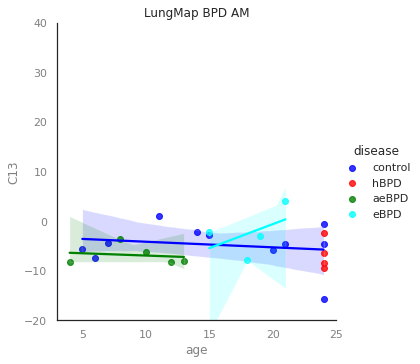

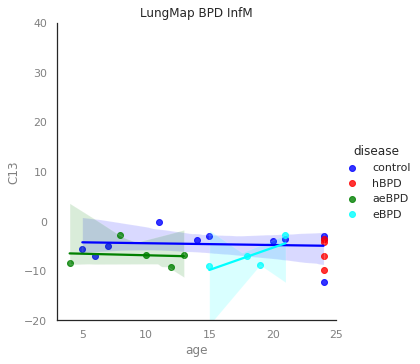

In [46]:
wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getSun2025BPDII()
ana.orderData(l1, wt1)
cell = ana.h.getSurvName("c predicted.cellref_celltype")
disease = ana.h.getSurvName("c disease")
atype = ana.h.getSurvName('c age')
btype = ana.h.getSurvName('c age-unit')
atype = [str(atype[i])+"-"+str(btype[i]) for i in range(len(atype))]
ahash = {'4-month':4, '5-month':5, '6-month':6, '7-month':7,
'8-month':8, '316-day':10, '11-month':11, '12-month':12,
'13-month':13, '14-month':14, '15-month':15, '18-month':18,
'19-month':19, '20-month':20, '21-month':21, '3-year':24}
age = [ahash[k] if k in ahash else None for k in atype]
sex = ana.h.getSurvName('c sex')
ahash = {'female':1, 'male':0}
sex_n = [ahash[k] if k in ahash else None for k in sex]
race = ana.h.getSurvName('c Race/ Ethnicity')
ahash = {'White':0, 'Hispanic':1, 'Black':2}
race_n = [ahash[k] if k in ahash else None for k in race]
ahash = {'White':0, 'Hispanic':0, 'Black':1}
black = [ahash[k] if k in ahash else None for k in race]
ahash = {'White':0, 'Hispanic':1, 'Black':0}
hisp = [ahash[k] if k in ahash else None for k in race]
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['sex'] = sex[2:]
df['gender'] = sex_n[2:]
df['source'] = 'LM'
df['race'] = race[2:]
df['eth'] = race_n[2:]
df['black'] = black[2:]
df['hispanic'] = hisp[2:]
df['disease'] = disease[2:]
df['cell'] = cell[2:]
df['cell'] = df['cell'].replace({'IM': 'InfM'})

list1 = ['pMON', 'iMON', 'AM', 'InfM']
for name in list1:
    df1 = df[ (df['disease'].isin(['control', 'aeBPD', 'hBPD', 'eBPD'])) &
             (df['cell'] == name)]
    g = bone.sns.lmplot(x='age', y='C13', hue='disease',
                        palette=['blue', 'red', 'green', 'cyan'], data=df1)
    import scipy
    ax = g.axes[0][0]
    ax.set_ylim([-20, 40])
    ax.set_title("LungMap BPD " + name)
# #     pdf.savefig(transparent=True, bbox_inches = 'tight')

# Figure 2 h-j

Shaykhiev 2009 balf COPD (n = 70)
GSE13896 http://hegemon.ucsd.edu/Tools/explore.php?key=mac&id=MAC11.2
70 [58, 12] GSE13896 http://hegemon.ucsd.edu/Tools/explore.php?key=mac&id=MAC11.2 MAC11.2
[106]
Qiang scRNAseq 2022 [human] (n = 9)
GSE183974 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T132
6 [3, 3] GSE183974 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T132 T132
[47]
Moon 2024 copd scblk (n = 12)
GSE270667 http://hegemon.ucsd.edu/Tools/explore.php?key=lung&id=LU25
6 [3, 3] GSE270667 http://hegemon.ucsd.edu/Tools/explore.php?key=lung&id=LU25 LU25
[48]


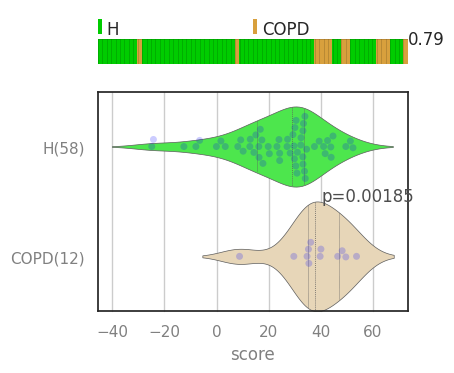

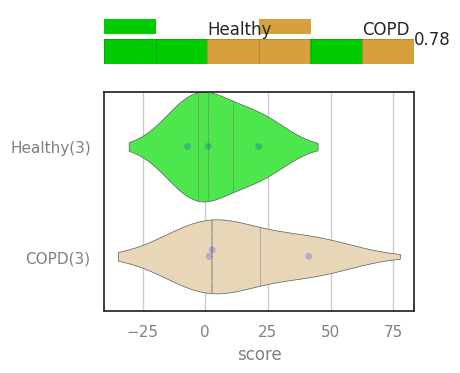

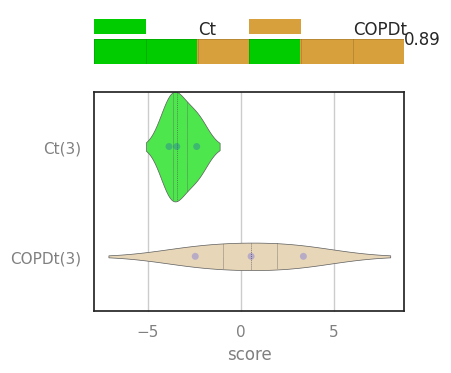

In [37]:
wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getShaykhiev2009(2)
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getQiang2021_sc(2)
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getMoon2024copd(2)
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)